# Import Packages

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras import regularizers

# Import Dataset

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [5]:
for col in df.columns[1:]:
    print(df[col].value_counts())

0    42000
Name: pixel0, dtype: int64
0    42000
Name: pixel1, dtype: int64
0    42000
Name: pixel2, dtype: int64
0    42000
Name: pixel3, dtype: int64
0    42000
Name: pixel4, dtype: int64
0    42000
Name: pixel5, dtype: int64
0    42000
Name: pixel6, dtype: int64
0    42000
Name: pixel7, dtype: int64
0    42000
Name: pixel8, dtype: int64
0    42000
Name: pixel9, dtype: int64
0    42000
Name: pixel10, dtype: int64
0    42000
Name: pixel11, dtype: int64
0      41998
116        1
10         1
Name: pixel12, dtype: int64
0      41998
254        1
216        1
Name: pixel13, dtype: int64
0      41999
216        1
Name: pixel14, dtype: int64
0    41999
9        1
Name: pixel15, dtype: int64
0    42000
Name: pixel16, dtype: int64
0    42000
Name: pixel17, dtype: int64
0    42000
Name: pixel18, dtype: int64
0    42000
Name: pixel19, dtype: int64
0    42000
Name: pixel20, dtype: int64
0    42000
Name: pixel21, dtype: int64
0    42000
Name: pixel22, dtype: int64
0    42000
Name: pixel23, dtype

0     41999
64        1
Name: pixel58, dtype: int64
0     41999
29        1
Name: pixel59, dtype: int64
0      41995
10         2
26         1
134        1
128        1
Name: pixel60, dtype: int64
0      41990
62         1
29         1
28         1
24         1
45         1
13         1
11         1
38         1
1          1
128        1
Name: pixel61, dtype: int64
0      41975
73         2
143        1
64         1
1          1
226        1
4          1
231        1
168        1
74         1
138        1
234        1
191        1
95         1
18         1
51         1
212        1
21         1
53         1
85         1
181        1
59         1
29         1
62         1
81         1
Name: pixel62, dtype: int64
0      41951
253        5
128        3
191        2
4          2
45         2
255        2
254        2
252        1
28         1
1          1
2          1
222        1
37         1
40         1
72         1
200        1
9          1
73         1
10         1
202        1
203   

0      41845
254       13
253        6
43         5
13         5
       ...  
238        1
143        1
16         1
48         1
45         1
Name: pixel107, Length: 97, dtype: int64
0      41940
255        5
8          3
25         3
1          2
188        2
254        2
21         2
117        2
7          2
191        1
140        1
202        1
170        1
232        1
72         1
198        1
103        1
143        1
133        1
5          1
99         1
98         1
34         1
2          1
128        1
13         1
80         1
175        1
249        1
190        1
62         1
156        1
251        1
155        1
91         1
27         1
184        1
48         1
119        1
55         1
54         1
51         1
18         1
241        1
223        1
113        1
Name: pixel108, dtype: int64
0      41983
29         2
42         1
2          1
66         1
100        1
164        1
7          1
73         1
63         1
47         1
146        1
19         1
115    

0      21074
253     3525
254     2294
255     1307
252     1290
       ...  
117       20
75        19
40        19
66        18
65        17
Name: pixel155, Length: 256, dtype: int64
0      21289
253     3444
254     1914
252     1543
255     1114
       ...  
103       21
189       21
46        21
124       18
61        17
Name: pixel156, Length: 256, dtype: int64
0      22888
253     3024
254     1558
252     1314
255      984
       ...  
124       20
46        18
93        17
54        14
90        14
Name: pixel157, Length: 256, dtype: int64
0      25541
253     2317
254     1255
252     1092
255      716
       ...  
100       18
75        18
90        17
127       17
33        14
Name: pixel158, Length: 256, dtype: int64
0      28984
253     1758
254      935
252      680
255      561
       ...  
93        14
58        14
78        14
184       13
90        12
Name: pixel159, Length: 256, dtype: int64
0      32563
253     1087
254      555
255      437
252      357
       ...

0      35565
253      635
252      394
254      286
255      187
       ...  
75         7
83         5
172        5
88         4
167        4
Name: pixel203, Length: 256, dtype: int64
0      31960
253     1275
252      646
254      546
255      314
       ...  
81        10
194       10
201        9
180        9
90         6
Name: pixel204, Length: 256, dtype: int64
0      27646
253     2034
252      948
254      894
255      457
       ...  
126       16
129       14
122       14
167       13
77        10
Name: pixel205, Length: 256, dtype: int64
0      22824
253     2753
252     1403
254     1317
255      604
       ...  
75        22
184       22
104       21
175       21
171       20
Name: pixel206, Length: 256, dtype: int64
0      18603
253     3471
252     1987
254     1713
255      751
       ...  
93        29
115       28
58        26
104       25
124       25
Name: pixel207, Length: 256, dtype: int64
0      15419
253     4344
252     2485
254     2186
255      895
       ...

0      18578
253     4283
254     2090
252     1900
255      889
       ...  
133       25
49        24
104       23
110       23
90        18
Name: pixel262, Length: 256, dtype: int64
0      16574
253     4868
254     2298
252     2283
255      783
       ...  
87        29
96        26
78        26
90        23
100       21
Name: pixel263, Length: 256, dtype: int64
0      16535
253     4840
254     2385
252     2108
255      788
       ...  
33        29
92        29
87        28
77        27
166       22
Name: pixel264, Length: 256, dtype: int64
0      17350
253     4411
254     2355
252     1841
255      779
       ...  
161       29
81        28
76        28
96        27
166       25
Name: pixel265, Length: 256, dtype: int64
0      18122
253     4108
254     2508
252     1503
255      865
       ...  
124       27
125       25
115       22
97        21
136       14
Name: pixel266, Length: 256, dtype: int64
0      18108
253     4018
254     2478
252     1412
255      911
       ...

0      21278
253     3011
254     1606
252     1278
255      552
       ...  
121       26
129       22
133       22
150       22
101       22
Name: pixel320, Length: 256, dtype: int64
0      22461
253     2475
254     1448
252     1124
255      488
       ...  
166       22
100       22
139       22
159       19
118       18
Name: pixel321, Length: 256, dtype: int64
0      22584
253     2916
254     1869
252     1192
255      524
       ...  
119       24
136       22
153       20
117       20
154       20
Name: pixel322, Length: 256, dtype: int64
0      20900
253     3543
254     2111
252     1400
255      652
       ...  
73        24
150       24
164       23
175       20
153       11
Name: pixel323, Length: 256, dtype: int64
0      18028
253     3675
254     2165
252     1815
255      665
       ...  
52        30
33        27
133       26
119       24
105       21
Name: pixel324, Length: 256, dtype: int64
0      16590
253     4229
254     2491
252     2019
255      717
       ...

0      20924
253     4034
254     2397
252     1510
255      649
       ...  
148       22
110       22
74        22
118       19
167       15
Name: pixel373, Length: 256, dtype: int64
0      19619
253     4143
254     2600
252     1452
255      815
       ...  
111       26
145       26
101       26
52        20
77        20
Name: pixel374, Length: 256, dtype: int64
0      20290
253     3613
254     2350
252     1533
255      699
       ...  
124       26
98        25
171       25
33        24
83        24
Name: pixel375, Length: 256, dtype: int64
0      20514
253     3386
254     2123
252     1508
255      635
       ...  
65        23
136       22
81        22
124       16
130       11
Name: pixel376, Length: 256, dtype: int64
0      18938
253     3863
254     2326
252     1656
255      769
       ...  
71        25
75        25
46        24
65        20
96        18
Name: pixel377, Length: 256, dtype: int64
0      17424
253     5338
254     3376
252     1905
255      998
       ...

0      22284
253     3615
254     2485
252     1235
255      764
       ...  
77        23
118       23
127       22
148       21
166       18
Name: pixel429, Length: 256, dtype: int64
0      20582
253     3618
254     2704
252     1231
255      800
       ...  
52        25
127       25
166       24
118       24
153       16
Name: pixel430, Length: 256, dtype: int64
0      19523
253     3669
254     2583
252     1397
255      741
       ...  
117       26
153       26
119       25
74        23
165       22
Name: pixel431, Length: 256, dtype: int64
0      17452
253     4202
254     2745
252     1624
255      763
       ...  
135       27
35        26
165       26
74        24
118       22
Name: pixel432, Length: 256, dtype: int64
0      15239
253     5472
254     3600
252     2091
255     1115
       ...  
120       25
75        24
103       20
157       17
87        17
Name: pixel433, Length: 256, dtype: int64
0      13190
253     6091
254     4253
252     2237
255     1833
       ...

0      36956
253      622
254      339
252      248
255      183
       ...  
174        3
179        2
116        2
151        2
46         1
Name: pixel481, Length: 256, dtype: int64
0      33513
253     1399
252      688
254      477
255      241
       ...  
179        8
178        8
106        8
175        7
120        6
Name: pixel482, Length: 256, dtype: int64
0      29917
253     2033
252     1010
254      759
255      309
       ...  
176       12
88        11
167       10
110        9
67         8
Name: pixel483, Length: 256, dtype: int64
0      27016
253     2577
252     1148
254     1136
255      397
       ...  
88        16
59        15
139       15
179       14
117        9
Name: pixel484, Length: 256, dtype: int64
0      25148
253     2883
254     1567
252     1204
255      519
       ...  
199       21
157       20
127       20
118       19
97        18
Name: pixel485, Length: 256, dtype: int64
0      23703
253     3018
254     1698
252     1237
255      613
       ...

0      35709
253      737
252      409
254      292
255      160
       ...  
181        5
204        5
178        5
166        5
134        4
Name: pixel526, Length: 256, dtype: int64
0      38622
253      329
252      161
254      109
255       62
       ...  
186        2
178        2
92         2
97         2
118        1
Name: pixel527, Length: 256, dtype: int64
0      40501
253      121
252       53
254       35
5         25
       ...  
219        1
171        1
194        1
134        1
66         1
Name: pixel528, Length: 248, dtype: int64
0      41556
253       33
252       10
128        8
3          8
       ...  
204        1
57         1
184        1
45         1
16         1
Name: pixel529, Length: 185, dtype: int64
0      41932
135        3
148        3
190        2
50         2
29         2
128        2
25         2
35         2
32         2
253        2
7          2
38         2
107        1
42         1
73         1
9          1
200        1
8          1
36         1


0      39900
253      179
252       95
254       68
255       40
       ...  
221        1
185        1
77         1
132        1
211        1
Name: pixel583, Length: 256, dtype: int64
0      41099
253       58
252       30
254       23
13        16
       ...  
157        1
221        1
217        1
132        1
184        1
Name: pixel584, Length: 236, dtype: int64
0      41720
253       16
254        6
128        6
191        5
       ...  
16         1
48         1
80         1
112        1
44         1
Name: pixel585, Length: 160, dtype: int64
0      41956
60         2
11         2
144        2
50         2
19         2
253        2
125        1
166        1
110        1
126        1
201        1
136        1
7          1
6          1
48         1
133        1
37         1
131        1
35         1
162        1
128        1
143        1
30         1
187        1
17         1
31         1
20         1
53         1
117        1
118        1
87         1
152        1
184        1
25 

0      14401
253     5690
254     2847
252     2723
255     1116
       ...  
89        25
105       25
87        24
52        23
167       21
Name: pixel629, Length: 256, dtype: int64
0      15210
253     5458
254     2903
252     2383
255     1235
       ...  
89        27
67        24
88        24
44        22
167       21
Name: pixel630, Length: 256, dtype: int64
0      17461
253     4776
254     2603
252     1802
255     1005
       ...  
88        25
105       23
83        22
101       22
58        20
Name: pixel631, Length: 256, dtype: int64
0      20762
253     3494
252     1747
254     1743
255      728
       ...  
200       23
87        22
53        22
58        22
105       20
Name: pixel632, Length: 256, dtype: int64
0      25128
253     2460
252     1310
254     1140
255      455
       ...  
99        20
68        19
98        19
133       17
97        15
Name: pixel633, Length: 256, dtype: int64
0      29735
253     1554
252      879
254      701
255      346
       ...

0      37110
253      529
252      312
254      165
255       96
       ...  
175        5
146        4
74         4
197        3
127        3
Name: pixel680, Length: 256, dtype: int64
0      34809
253      975
252      473
254      360
255      162
       ...  
90         6
77         6
87         6
109        6
184        5
Name: pixel681, Length: 256, dtype: int64
0      32457
253     1425
252      662
254      572
255      204
       ...  
77         9
127        9
175        9
68         7
109        6
Name: pixel682, Length: 256, dtype: int64
0      30474
253     1794
252      928
254      658
255      290
       ...  
176       12
107       11
74        11
188       10
134        9
Name: pixel683, Length: 256, dtype: int64
0      29359
253     1855
252     1024
254      801
255      325
       ...  
93        15
77        15
79        14
87        14
60        13
Name: pixel684, Length: 256, dtype: int64
0      29346
253     1872
252      961
254      900
255      387
       ...

0      41832
254        6
253        6
252        5
146        4
       ...  
17         1
209        1
222        1
126        1
110        1
Name: pixel734, Length: 112, dtype: int64
0      41643
253       32
252       18
13         9
254        6
       ...  
211        1
20         1
180        1
244        1
17         1
Name: pixel735, Length: 167, dtype: int64
0      41395
253       56
252       45
254       14
255       10
       ...  
80         1
176        1
81         1
145        1
239        1
Name: pixel736, Length: 208, dtype: int64
0      41055
253       91
252       39
254       32
255       20
       ...  
133        1
69         1
119        1
247        1
175        1
Name: pixel737, Length: 232, dtype: int64
0      40666
253      127
252       63
254       47
255       27
       ...  
153        1
36         1
138        1
195        1
121        1
Name: pixel738, Length: 245, dtype: int64
0      40316
253      172
252       90
254       59
255       31
       ...

# Train-Test Split

In [6]:
X = df.drop(['label'], axis = 1)
y = df['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [8]:
train = pd.concat([X_train, y_train], axis=1)
target = 'label'
predictors = [x for x in train.columns if x not in [target]]

# Neural Network

In [9]:
print(X_train.shape)
X_test.shape

(33600, 784)


(8400, 784)

In [10]:
X_train /= 255.
X_test /= 255.

In [11]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## First Model

In [27]:
model_1 = Sequential()
model_1.add(Dense(64, activation='tanh', input_shape=(784,)))
model_1.add(Dense(10, activation='softmax'))

In [28]:
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [29]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [30]:
results_1 = model_1.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/50
33600/33600 [==============================] - 2s 54us/step - loss: 1.0469 - acc: 0.7452 - val_loss: 0.6472 - val_acc: 0.8452
Epoch 2/50
33600/33600 [==============================] - 2s 48us/step - loss: 0.5522 - acc: 0.8650 - val_loss: 0.4945 - val_acc: 0.8713
Epoch 3/50
33600/33600 [==============================] - 2s 51us/step - loss: 0.4525 - acc: 0.8837 - val_loss: 0.4305 - val_acc: 0.8835
Epoch 4/50
33600/33600 [==============================] - 2s 51us/step - loss: 0.4035 - acc: 0.8921 - val_loss: 0.3942 - val_acc: 0.8912
Epoch 5/50
33600/33600 [==============================] - 2s 49us/step - loss: 0.3731 - acc: 0.8985 - val_loss: 0.3699 - val_acc: 0.8960
Epoch 6/50
33600/33600 [==============================] - 2s 47us/step - loss: 0.3514 - acc: 0.9028 - val_loss: 0.3528 - val_acc: 0.9006
Epoch 7/50
33600/33600 [==============================] - 2s 47us/step - loss: 0.3348 - acc: 0.9063 - val_loss: 0.3387 - val_acc:

In [14]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

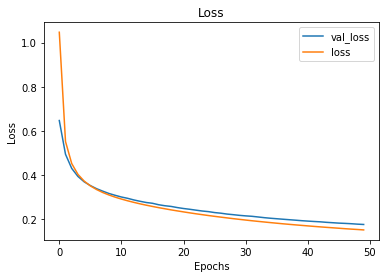

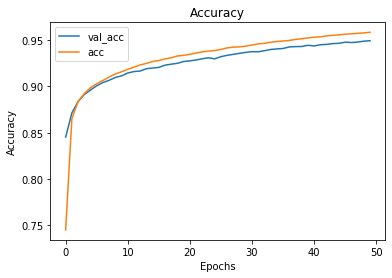

In [32]:
visualize_training_results(results_1)

## Second Model

In [45]:
model_2 = Sequential()
model_2.add(Dense(64, activation='tanh', input_shape=(784,)))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(10, activation='softmax'))

In [46]:
model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [47]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [48]:
results_2 = model_2.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/200
33600/33600 [==============================] - 2s 63us/step - loss: 1.1713 - acc: 0.7151 - val_loss: 0.7181 - val_acc: 0.8448
Epoch 2/200
33600/33600 [==============================] - 2s 52us/step - loss: 0.5891 - acc: 0.8627 - val_loss: 0.5106 - val_acc: 0.8736
Epoch 3/200
 6656/33600 [====>.........................] - ETA: 1s - loss: 0.4844 - acc: 0.8830

KeyboardInterrupt: 

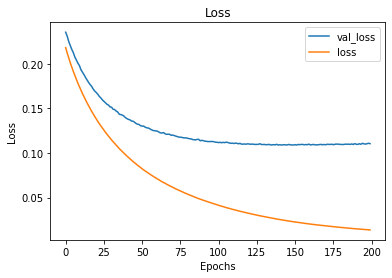

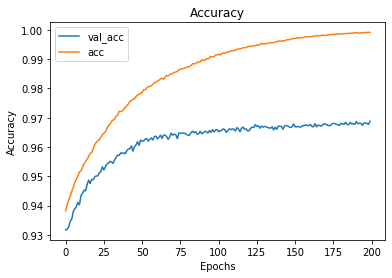

In [39]:
visualize_training_results(results_2)

## Third Model

In [40]:
model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_shape=(784,)))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

In [41]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [44]:
results_3 = model_3.fit(X_train, y_train, epochs=400, batch_size=64, validation_data=(X_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/400
33600/33600 [==============================] - 2s 54us/step - loss: 0.4174 - acc: 0.8831 - val_loss: 0.3979 - val_acc: 0.8869
Epoch 2/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.3686 - acc: 0.8948 - val_loss: 0.3607 - val_acc: 0.8951
Epoch 3/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.3401 - acc: 0.9023 - val_loss: 0.3395 - val_acc: 0.9012
Epoch 4/400
33600/33600 [==============================] - 2s 51us/step - loss: 0.3194 - acc: 0.9074 - val_loss: 0.3228 - val_acc: 0.9065
Epoch 5/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.3029 - acc: 0.9119 - val_loss: 0.3116 - val_acc: 0.9079
Epoch 6/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.2888 - acc: 0.9166 - val_loss: 0.2964 - val_acc: 0.9146
Epoch 7/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.2762 - acc: 0.9205 - val_loss: 0.2849 - v

Epoch 118/400
33600/33600 [==============================] - 2s 54us/step - loss: 0.0214 - acc: 0.9967 - val_loss: 0.1156 - val_acc: 0.9665
Epoch 119/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0210 - acc: 0.9967 - val_loss: 0.1164 - val_acc: 0.9660
Epoch 120/400
33600/33600 [==============================] - 2s 55us/step - loss: 0.0206 - acc: 0.9966 - val_loss: 0.1157 - val_acc: 0.9665
Epoch 121/400
33600/33600 [==============================] - 2s 66us/step - loss: 0.0201 - acc: 0.9972 - val_loss: 0.1162 - val_acc: 0.9667
Epoch 122/400
33600/33600 [==============================] - 2s 54us/step - loss: 0.0197 - acc: 0.9971 - val_loss: 0.1164 - val_acc: 0.9664
Epoch 123/400
33600/33600 [==============================] - 2s 53us/step - loss: 0.0195 - acc: 0.9973 - val_loss: 0.1156 - val_acc: 0.9671
Epoch 124/400
33600/33600 [==============================] - 2s 51us/step - loss: 0.0191 - acc: 0.9974 - val_loss: 0.1172 - val_acc: 0.9669
Epoch 125/400
33600/

33600/33600 [==============================] - 2s 47us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.1381 - val_acc: 0.9663
Epoch 235/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.1384 - val_acc: 0.9667
Epoch 236/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.0040 - acc: 1.0000 - val_loss: 0.1382 - val_acc: 0.9662
Epoch 237/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.1383 - val_acc: 0.9667
Epoch 238/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.0039 - acc: 1.0000 - val_loss: 0.1382 - val_acc: 0.9665
Epoch 239/400
33600/33600 [==============================] - 2s 52us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.1390 - val_acc: 0.9663
Epoch 240/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.1385 - val_acc: 0.9661
Epoch 241/400
33600/33600 [=======

33600/33600 [==============================] - 2s 50us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1535 - val_acc: 0.9665
Epoch 351/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1526 - val_acc: 0.9665
Epoch 352/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1524 - val_acc: 0.9667
Epoch 353/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1522 - val_acc: 0.9668
Epoch 354/400
33600/33600 [==============================] - 2s 50us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1529 - val_acc: 0.9664
Epoch 355/400
33600/33600 [==============================] - 2s 49us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1526 - val_acc: 0.9663
Epoch 356/400
33600/33600 [==============================] - 2s 52us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.1530 - val_acc: 0.9667
Epoch 357/400
33600/33600 [=======

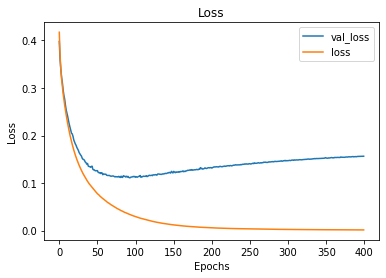

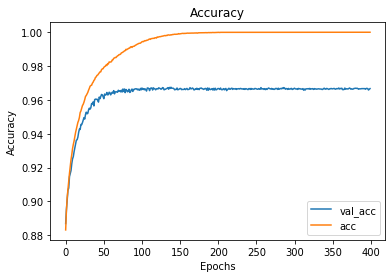

In [45]:
visualize_training_results(results_3)

## Fourth Model

In [69]:
model_4 = Sequential()
model_4.add(Dense(64, activation='relu', input_shape=(784,)))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(64, activation='relu'))
model_4.add(Dense(32, activation='relu'))
model_4.add(Dense(10, activation='softmax'))

In [70]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_58 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_59 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_60 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_61 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_62 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_63 (Dense)             (None, 64)                4160      
__________

In [71]:
model_4.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [73]:
results_4 = model_4.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/200
33600/33600 [==============================] - 2s 59us/step - loss: 0.0986 - acc: 0.9708 - val_loss: 0.1539 - val_acc: 0.9564
Epoch 2/200
33600/33600 [==============================] - 2s 59us/step - loss: 0.0899 - acc: 0.9737 - val_loss: 0.1556 - val_acc: 0.9550
Epoch 3/200
33600/33600 [==============================] - 2s 59us/step - loss: 0.0844 - acc: 0.9752 - val_loss: 0.1489 - val_acc: 0.9581
Epoch 4/200
33600/33600 [==============================] - 2s 59us/step - loss: 0.0794 - acc: 0.9766 - val_loss: 0.1535 - val_acc: 0.9577
Epoch 5/200
33600/33600 [==============================] - 2s 58us/step - loss: 0.0722 - acc: 0.9796 - val_loss: 0.1411 - val_acc: 0.9607
Epoch 6/200
33600/33600 [==============================] - 2s 58us/step - loss: 0.0665 - acc: 0.9809 - val_loss: 0.1483 - val_acc: 0.9601
Epoch 7/200
33600/33600 [==============================] - 2s 58us/step - loss: 0.0636 - acc: 0.9816 - val_loss: 0.1556 - v

33600/33600 [==============================] - 2s 60us/step - loss: 1.0242e-04 - acc: 1.0000 - val_loss: 0.2756 - val_acc: 0.9619
Epoch 117/200
33600/33600 [==============================] - 2s 59us/step - loss: 1.0071e-04 - acc: 1.0000 - val_loss: 0.2764 - val_acc: 0.9619
Epoch 118/200
33600/33600 [==============================] - 2s 60us/step - loss: 9.9361e-05 - acc: 1.0000 - val_loss: 0.2764 - val_acc: 0.9618
Epoch 119/200
33600/33600 [==============================] - 2s 60us/step - loss: 9.8382e-05 - acc: 1.0000 - val_loss: 0.2768 - val_acc: 0.9618
Epoch 120/200
33600/33600 [==============================] - 2s 59us/step - loss: 9.6490e-05 - acc: 1.0000 - val_loss: 0.2768 - val_acc: 0.9618
Epoch 121/200
33600/33600 [==============================] - 2s 58us/step - loss: 9.5376e-05 - acc: 1.0000 - val_loss: 0.2773 - val_acc: 0.9617
Epoch 122/200
33600/33600 [==============================] - 2s 60us/step - loss: 9.4147e-05 - acc: 1.0000 - val_loss: 0.2776 - val_acc: 0.9618
Epoch 

Epoch 173/200
33600/33600 [==============================] - 2s 60us/step - loss: 5.4158e-05 - acc: 1.0000 - val_loss: 0.2892 - val_acc: 0.9623
Epoch 174/200
33600/33600 [==============================] - 2s 60us/step - loss: 5.3646e-05 - acc: 1.0000 - val_loss: 0.2892 - val_acc: 0.9621
Epoch 175/200
33600/33600 [==============================] - 2s 60us/step - loss: 5.3166e-05 - acc: 1.0000 - val_loss: 0.2891 - val_acc: 0.9623
Epoch 176/200
33600/33600 [==============================] - 2s 60us/step - loss: 5.2741e-05 - acc: 1.0000 - val_loss: 0.2895 - val_acc: 0.9620
Epoch 177/200
33600/33600 [==============================] - 2s 59us/step - loss: 5.2167e-05 - acc: 1.0000 - val_loss: 0.2895 - val_acc: 0.9620
Epoch 178/200
33600/33600 [==============================] - 2s 58us/step - loss: 5.1782e-05 - acc: 1.0000 - val_loss: 0.2899 - val_acc: 0.9623
Epoch 179/200
33600/33600 [==============================] - 2s 59us/step - loss: 5.1408e-05 - acc: 1.0000 - val_loss: 0.2901 - val_acc:

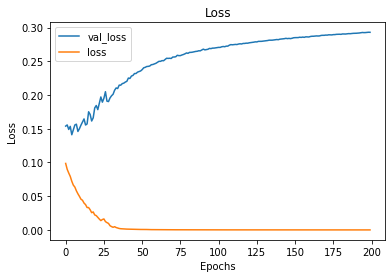

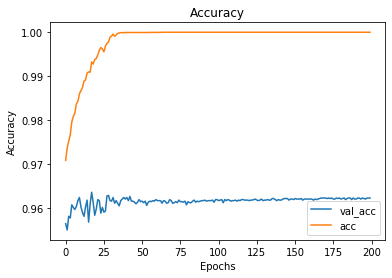

In [74]:
visualize_training_results(results_4)

## Fifth Model

In [21]:
model_5 = Sequential()
model_5.add(Dense(64, activation='relu', input_shape=(784,)))
model_5.add(Dense(64, activation='tanh'))
model_5.add(Dense(64, activation='relu'))
model_5.add(Dense(64, activation='tanh'))
model_5.add(Dense(64, activation='relu'))
model_5.add(Dense(64, activation='tanh'))
model_5.add(Dense(64, activation='tanh'))
model_5.add(Dense(32, activation='relu'))
model_5.add(Dense(10, activation='softmax'))

In [22]:
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
__________

In [23]:
model_5.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [24]:
results_5 = model_5.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/200
33600/33600 [==============================] - 2s 73us/step - loss: 1.7304 - acc: 0.4336 - val_loss: 0.9556 - val_acc: 0.7654
Epoch 2/200
33600/33600 [==============================] - 2s 63us/step - loss: 0.6119 - acc: 0.8489 - val_loss: 0.4479 - val_acc: 0.8807
Epoch 3/200
33600/33600 [==============================] - 2s 63us/step - loss: 0.3655 - acc: 0.9004 - val_loss: 0.3273 - val_acc: 0.9085
Epoch 4/200
33600/33600 [==============================] - 2s 66us/step - loss: 0.2862 - acc: 0.9196 - val_loss: 0.2732 - val_acc: 0.9211
Epoch 5/200
33600/33600 [==============================] - 2s 71us/step - loss: 0.2393 - acc: 0.9323 - val_loss: 0.2402 - val_acc: 0.9314
Epoch 6/200
33600/33600 [==============================] - 2s 69us/step - loss: 0.2069 - acc: 0.9409 - val_loss: 0.2234 - val_acc: 0.9344
Epoch 7/200
33600/33600 [==============================] - 2s 68us/step - loss: 0.1831 - acc: 0.9471 - val_loss: 0.2053 - v

Epoch 118/200
33600/33600 [==============================] - 2s 58us/step - loss: 8.7623e-04 - acc: 0.9999 - val_loss: 0.1883 - val_acc: 0.9639
Epoch 119/200
33600/33600 [==============================] - 3s 78us/step - loss: 8.4489e-04 - acc: 0.9999 - val_loss: 0.1875 - val_acc: 0.9638
Epoch 120/200
33600/33600 [==============================] - 3s 90us/step - loss: 8.2336e-04 - acc: 0.9999 - val_loss: 0.1874 - val_acc: 0.9638
Epoch 121/200
33600/33600 [==============================] - 3s 86us/step - loss: 7.9130e-04 - acc: 0.9999 - val_loss: 0.1879 - val_acc: 0.9640
Epoch 122/200
33600/33600 [==============================] - 2s 73us/step - loss: 7.6694e-04 - acc: 0.9999 - val_loss: 0.1882 - val_acc: 0.9635
Epoch 123/200
33600/33600 [==============================] - 2s 63us/step - loss: 7.4781e-04 - acc: 0.9999 - val_loss: 0.1880 - val_acc: 0.9635
Epoch 124/200
33600/33600 [==============================] - 2s 61us/step - loss: 7.2925e-04 - acc: 0.9999 - val_loss: 0.1897 - val_acc:

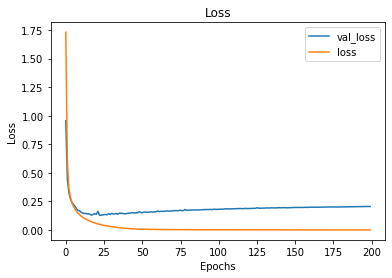

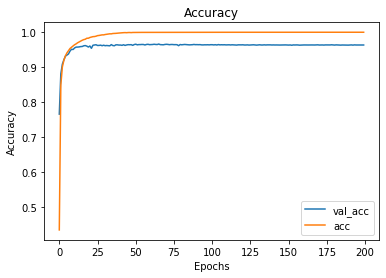

In [25]:
visualize_training_results(results_5)

## Sixth Model

## Seventh Model

## Eight Model

## Ninth Model